# Making ROOT style plots in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import boost_histogram as bh
import matplotlib.colors as colors
import pandas as pd
from scipy.stats import iqr

In [2]:
base_dir="/lustre/work/madihowa/CERN/EnergyCalibration/results" 
results="run3_e100_three_inputs_2021-07-21-22_55_15/results.csv"
results_csv = "{}/{}".format(base_dir,results)

In [21]:
results_csv = "/lustre/work/madihowa/CERN/ClusterCalibration/old_results/Results_2021-06-24_run_11/results.csv"

In [22]:
og_df = pd.read_csv(results_csv)

In [23]:
og_df

,runNumber,eventNumber,truthE,truthPt,truthEta,truthPhi,truthPDG,nCluster,clusterIndex,cluster_nCells,...,cluster_CELL_SIG_SAMPLING,cluster_AVG_LAR_Q,cluster_AVG_TILE_Q,cluster_ENG_BAD_HV_CELLS,cluster_N_BAD_HV_CELLS,cluster_PTD,cluster_MASS,EM_Shower,EM_Pro,CalibratedE
0,284500,273.0,1950.73000,1587.25000,0.664467,-2.114400,211,3,0,435,...,2,0.000145,2.703260,13.879100,125,0.437813,4.126580e+01,0,0.355046,1751.724400
1,284500,273.0,1950.73000,1587.25000,0.664467,-2.114400,211,3,1,80,...,13,0.460298,29.557500,1.278980,24,0.364060,5.765980e+00,0,0.003445,70.125916
2,284500,273.0,1950.73000,1587.25000,0.664467,-2.114400,211,3,2,3,...,14,0.000000,2.765250,0.000000,0,0.698266,2.686330e-02,0,0.007142,0.319279
3,284500,375.0,18.61910,18.38310,0.159894,-1.081690,211,2,0,46,...,12,0.000000,0.996167,0.000000,0,0.517595,3.911450e-01,0,0.083854,12.664865
4,284500,375.0,18.61910,18.38310,0.159894,-1.081690,211,2,1,1,...,13,0.000000,2.000000,0.000000,0,1.000000,6.361800e-09,0,0.059693,0.081188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472610,284500,931819.0,738.88300,728.57200,0.168043,-0.276307,111,1,0,300,...,2,0.000198,0.920840,3.296340,47,0.485433,1.702440e+01,1,0.904244,708.833800
472611,284500,932463.0,17.24830,16.60190,-0.278047,-1.236610,111,1,0,61,...,2,0.000000,0.000000,0.039142,1,0.483612,3.092970e-01,1,0.789264,16.066280
472612,284500,932115.0,4.79216,4.74031,-0.145045,-2.044620,111,1,0,26,...,1,0.327654,0.000000,0.112986,1,0.381194,5.724170e-02,1,0.913600,3.285995
472613,284500,931612.0,110.59200,106.85600,-0.263668,-1.244990,111,2,0,128,...,1,0.000000,0.000000,2.801410,3,0.388228,2.211170e+00,1,0.993237,103.674700


In [24]:
em_df = og_df[og_df["truthPDG"] == 111]
em_df

,runNumber,eventNumber,truthE,truthPt,truthEta,truthPhi,truthPDG,nCluster,clusterIndex,cluster_nCells,...,cluster_CELL_SIG_SAMPLING,cluster_AVG_LAR_Q,cluster_AVG_TILE_Q,cluster_ENG_BAD_HV_CELLS,cluster_N_BAD_HV_CELLS,cluster_PTD,cluster_MASS,EM_Shower,EM_Pro,CalibratedE
235069,284500,1763.0,532.18100,433.84800,0.661171,2.553770,111,1,0,240,...,2,0.000264,0.00000,1.638590,6,0.506213,10.802800,1,0.893990,522.930000
235070,284500,1500.0,7.64041,7.63916,-0.003771,-0.221088,111,1,0,39,...,1,0.025107,0.00000,6.511130,29,0.318872,0.137013,1,0.922116,6.379313
235071,284500,25.0,5.51458,5.51237,0.014204,-0.091146,111,2,0,21,...,1,0.000000,0.00000,2.673850,18,0.355344,0.054727,1,0.916890,2.799057
235072,284500,25.0,5.51458,5.51237,0.014204,-0.091146,111,2,1,24,...,1,0.000000,0.00000,0.143067,1,0.362640,0.042127,1,0.877431,1.155006
235073,284500,417.0,24.71970,21.15830,0.572335,-1.457300,111,1,0,91,...,1,0.000000,0.00000,0.114984,3,0.309238,0.563798,1,0.952392,22.862549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472610,284500,931819.0,738.88300,728.57200,0.168043,-0.276307,111,1,0,300,...,2,0.000198,0.92084,3.296340,47,0.485433,17.024400,1,0.904244,708.833800
472611,284500,932463.0,17.24830,16.60190,-0.278047,-1.236610,111,1,0,61,...,2,0.000000,0.00000,0.039142,1,0.483612,0.309297,1,0.789264,16.066280
472612,284500,932115.0,4.79216,4.74031,-0.145045,-2.044620,111,1,0,26,...,1,0.327654,0.00000,0.112986,1,0.381194,0.057242,1,0.913600,3.285995
472613,284500,931612.0,110.59200,106.85600,-0.263668,-1.244990,111,2,0,128,...,1,0.000000,0.00000,2.801410,3,0.388228,2.211170,1,0.993237,103.674700


In [25]:
had_df = og_df[og_df["truthPDG"] == 211]
had_df

,runNumber,eventNumber,truthE,truthPt,truthEta,truthPhi,truthPDG,nCluster,clusterIndex,cluster_nCells,...,cluster_CELL_SIG_SAMPLING,cluster_AVG_LAR_Q,cluster_AVG_TILE_Q,cluster_ENG_BAD_HV_CELLS,cluster_N_BAD_HV_CELLS,cluster_PTD,cluster_MASS,EM_Shower,EM_Pro,CalibratedE
0,284500,273.0,1950.7300,1587.2500,0.664467,-2.11440,211,3,0,435,...,2,0.000145,2.703260,13.879100,125,0.437813,4.126580e+01,0,0.355046,1751.724400
1,284500,273.0,1950.7300,1587.2500,0.664467,-2.11440,211,3,1,80,...,13,0.460298,29.557500,1.278980,24,0.364060,5.765980e+00,0,0.003445,70.125916
2,284500,273.0,1950.7300,1587.2500,0.664467,-2.11440,211,3,2,3,...,14,0.000000,2.765250,0.000000,0,0.698266,2.686330e-02,0,0.007142,0.319279
3,284500,375.0,18.6191,18.3831,0.159894,-1.08169,211,2,0,46,...,12,0.000000,0.996167,0.000000,0,0.517595,3.911450e-01,0,0.083854,12.664865
4,284500,375.0,18.6191,18.3831,0.159894,-1.08169,211,2,1,1,...,13,0.000000,2.000000,0.000000,0,1.000000,6.361800e-09,0,0.059693,0.081188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117800,284500,596123.0,1838.0100,1436.2500,0.731550,2.34236,211,6,2,32,...,13,0.000000,32.114000,0.000000,0,0.407545,9.934620e-01,0,0.004429,11.560569
117801,284500,596123.0,1838.0100,1436.2500,0.731550,2.34236,211,6,5,3,...,3,0.000000,0.000000,0.240689,3,0.785975,2.960640e-03,0,0.060603,0.155055
117802,284500,596866.0,763.1330,726.2220,0.317495,-1.38079,211,3,0,292,...,2,0.651133,2.207910,0.381693,6,0.310740,3.829990e+01,0,0.000919,718.359800
117803,284500,596866.0,763.1330,726.2220,0.317495,-1.38079,211,3,1,4,...,12,0.000000,13.880900,0.000000,0,0.869922,7.115230e-02,0,0.058702,1.719824


# Implementing the relevant methods from PlotHisto.*



In [26]:
def plothist2d(h,Ratio,xedges,title):
    
    fig, ax = plt.subplots(figsize=(16,8))

    zs = h.view().T #color info    
    cmap = plt.get_cmap('viridis', 20)
    cmap.set_under('gray')

    pcm = ax.pcolor(*h.axes.edges.T, zs, cmap = cmap, 
                   norm = colors.LogNorm(vmin=1 ,vmax=zs.max())) #log scale of Z
    
    
    fig.colorbar(pcm, ax=ax) #adds the colorbar
    plt.xscale("log")     
    plt.xlim([min(h.axes.edges[0]),max(h.axes.edges[0])])
    plt.ylim([0,2])
  #  plt.plot(Ratio,color="red",lw=0.75)
    

    plt.title(title,fontsize=16)
    plt.xlabel("Cluster Energy [GeV]",fontsize=14)
    plt.ylabel(r"Ratio = $\frac{Calibrated Energy}{Cluster Energy}$",fontsize=14)
    
    if title == "EM Tree":
        plt.text(10**2,1.75, f"$\pi^0$ clusters", color="red", fontsize=23)
    elif title == "Had Tree":
        plt.text(10**2,1.75, r"$\pi^\pm$ clusters", color="red", fontsize=23)
    plt.show()


def Plot_performance(df,title=""):
    l_true = df["cluster_ENG_CALIB_TOT"].values
    l_calib = df["CalibratedE"].values
    Ratio = l_calib/l_true
    
    n1 = len(l_true)
    n2 = len(l_calib)
    n_entries = n1

    MinX = .05
    MaxX = max(l_true)

    MaxY = 2
    MinY = 0

    n_bins = 100
    
    LogWidth  = []
    yWidth = []

    for i in range(n_bins+1):
        exponent = np.log10(MinX) + (np.log10(MaxX) - np.log10(MinX))/float(n_bins)*i
        LogWidth.append(pow(10, exponent))
        yWidth.append(MinY + i*(MaxY - MinY)/n_bins)
        
    #defines how axes are spaced
    xaxes = bh.axis.Variable(LogWidth, underflow=True, overflow=True) 
    yaxes = bh.axis.Variable(yWidth, underflow=True, overflow=True)
    
    hist = bh.Histogram(xaxes,yaxes)
    
    values = np.array([l_true,Ratio])
    
    hist.reset()
    hist.fill(*values)
    
    h = hist.view().T 
    axes = hist.axes.edges.T
    xedges = axes[0][0]
    xedges = np.array([(xedges[i+1] + xedges[i])/2 for i in range(len(xedges)-1)])
    yedges = axes.T[1].flatten()
    yedges = np.array([(yedges[i+1] + yedges[i])/2 for i in range(len(yedges)-1)])
    
    MRatio = GraphMean(len(xedges),len(yedges),h,xedges,yedges)
    plothist2d(hist,MRatio,xedges,title)
   # return hist

In [27]:
def GraphMean(n_BinsX,n_BinsY,h,Xaxis,Yaxis):
    """
    print("n_BinsX: ", n_BinsX)
    print("n_BinsY: ", n_BinsY)
   # print("Xaxis: ", Xaxis)
   # print("Yaxis: ", Yaxis)
    print("n_BinsX: ", n_BinsX)
    print("n_BinsY: ", n_BinsY)
    print("h shape: ",h.shape)
#    print("h:\n",h) 
    """
    ColumnSum = 0
    print("h shape: ",h.shape)

    ColumnWeightedSum = 0
    ArrX, ArrY = [], []
    n_NAN = 1
    
    for i in range(1,n_BinsX):
        ColumnSum = 0
        ColumnWeightedSum = 0
        for j in range(0,n_BinsY-1):
            ColumnWeightedSum += Yaxis[j] * h[i][j]
            ColumnSum += h[i][j]
        if (ColumnSum != 0):
            ArrY.append(ColumnWeightedSum / ColumnSum)
        else:
            ArrY.append(0)
            n_NAN = i+1
        try:
            if (ArrY[i] > 2):
                n_NAN += 1  
        except:
            pass
        ArrX.append(Xaxis[i])
       # print("ArrY[i]:\t{}\tArrX[i]:\t{}".format(ArrY[i],ArrX[i]))
        
    print("NAN: ", n_NAN)
   # plt.plot(ArrX[n_NAN:n_BinsX-n_NAN],ArrY[n_NAN:n_BinsY-n_NAN],'.--')
   # plt.xscale("log")
   # plt.show()
    return ArrY[n_NAN:n_BinsX-n_NAN]

h shape:  (100, 100)
NAN:  1


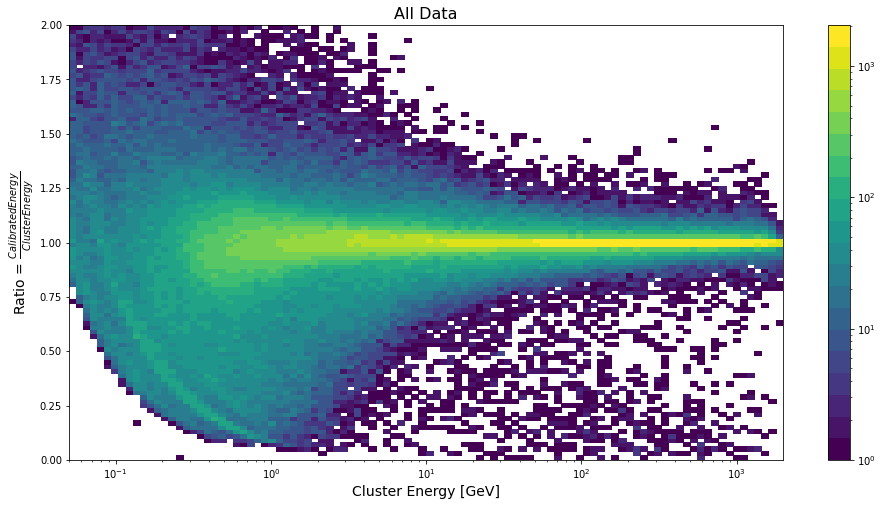

In [28]:
Plot_performance(og_df,"All Data")

h shape:  (100, 100)
NAN:  4


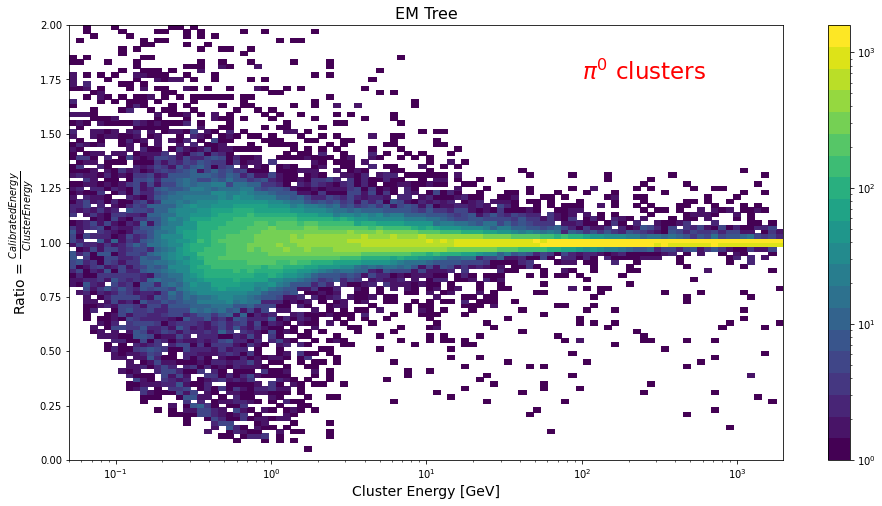

In [29]:
em_hist = Plot_performance(em_df,"EM Tree")

h shape:  (100, 100)
NAN:  1


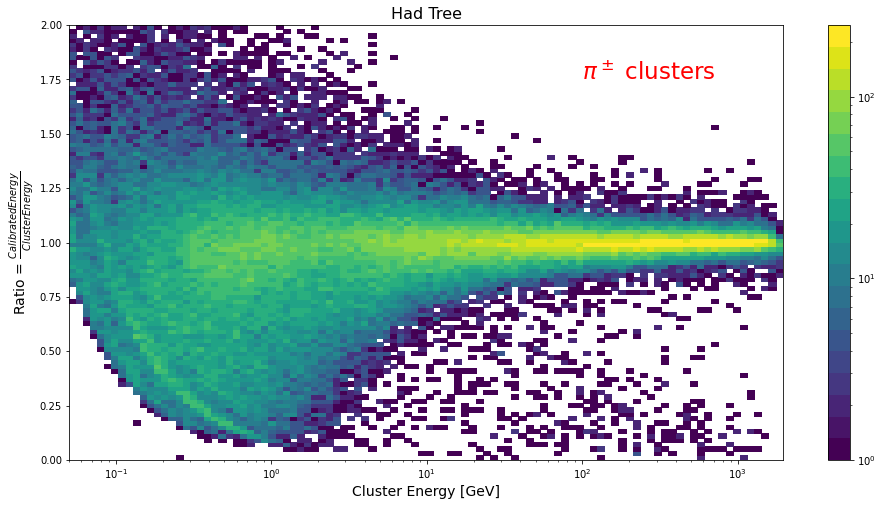

In [30]:
had_hist = Plot_performance(had_df,"Had Tree")

# Plotting AAAA, IQR and EngvsEng

In [31]:
"""

## Needs implementation
class TitleAxis{
    public:
        const char *TitleX;
        const char *TitleY;
        const char *AxisTitle;
        const char *SaveName;
        Bool_t LogY = 0;
        Bool_t LogX = 0;
};
"""

class Bounds:
    
    def __init__(self, maxX, maxY, minX, minY, TitleX, TitleY):
        self.maxX = maxX
        self.maxY = maxY
        self.minX = minX
        self.minY = minY
        self.TitleX = TitleX
        self.TitleY = TitleY

### EngvsEng.png

In [32]:
b1 = Bounds(10, 10, min(og_df["cluster_ENG_CALIB_TOT"].values), min(og_df["clusterE"].values), "True Energy [GeV]", "Cluster Energy [GeV]")

In [33]:
def TH2D(h,LogX,LogY,title,titleX,titleY):
    
    fig, ax = plt.subplots(figsize=(16,8))  
    
    if (LogX):
        plt.xscale("log")
    if (LogY):
        plt.yscale("log")
    
    zs = h.view().T #color info    
    
    cmap = plt.get_cmap('viridis', 20)
    cmap.set_under('gray')

    pcm = ax.pcolor(*h.axes.edges.T, zs, cmap = cmap, 
                   norm = colors.LogNorm(vmin=1 ,vmax=zs.max())) #log scale of Z
    
    fig.colorbar(pcm, ax=ax) #adds the colorbar
    

    plt.title(title,fontsize=16)
    plt.xlabel(titleX,fontsize=14)
    plt.ylabel(titleY,fontsize=14)
    
    plt.show()


def Plot_TH2D(df, First, Second, titleX, titleY, bound, LogX=False, LogY=False, n_bins=100, title=""):
    
    xvalues = df[First].values
    yvalues = df[Second].values

        
    yWidth = []
    xWidth = []
    
    for i in range(n_bins+1):
        if (LogX):
            exp1 = np.log10(bound.minX) + (np.log10(bound.maxX) - np.log10(bound.minX)) / n_bins*i
            xWidth.append(pow(10, exp1))
        else:
            xWidth.append( bound.minX + i*(bound.maxX - bound.minX)/n_bins )

        if (LogY):
            exp2 = np.log10(bound.minY) + (np.log10(bound.maxY) - np.log10(bound.minY)) / n_bins*i
            yWidth.append(pow(10, exp2))
        else:
            yWidth.append( bound.minY + i*(bound.maxY - bound.minY)/n_bins )
    
    xaxes = bh.axis.Variable(xWidth, underflow=True, overflow=True) 
    yaxes = bh.axis.Variable(yWidth, underflow=True, overflow=True)
    
    hist = bh.Histogram(xaxes,yaxes)
    values = np.array([xvalues,yvalues])
    
    hist.reset()
    hist.fill(*values)
    
        
    TH2D(hist,LogX,LogY,title,titleX, titleY)

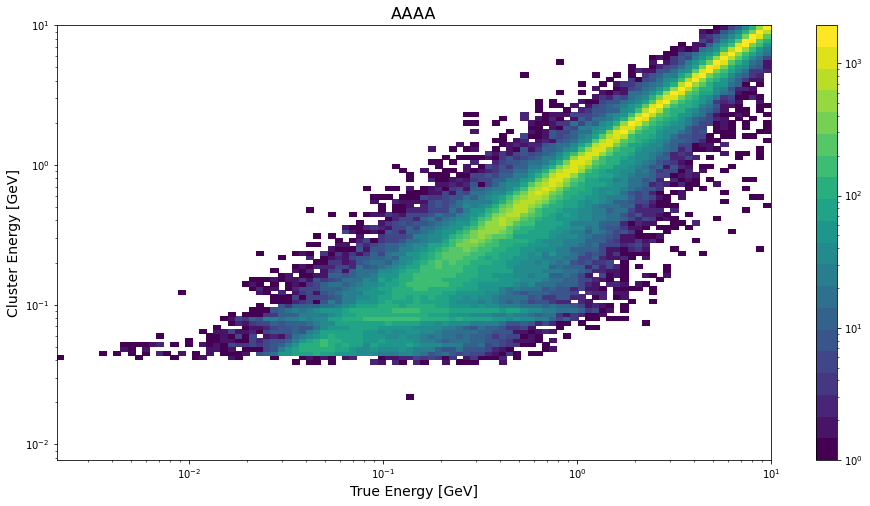

In [34]:
Plot_TH2D(og_df, "cluster_ENG_CALIB_TOT", "CalibratedE", "True Energy [GeV]", "Cluster Energy [GeV]", b1, True, True, n_bins=100, title="AAAA")

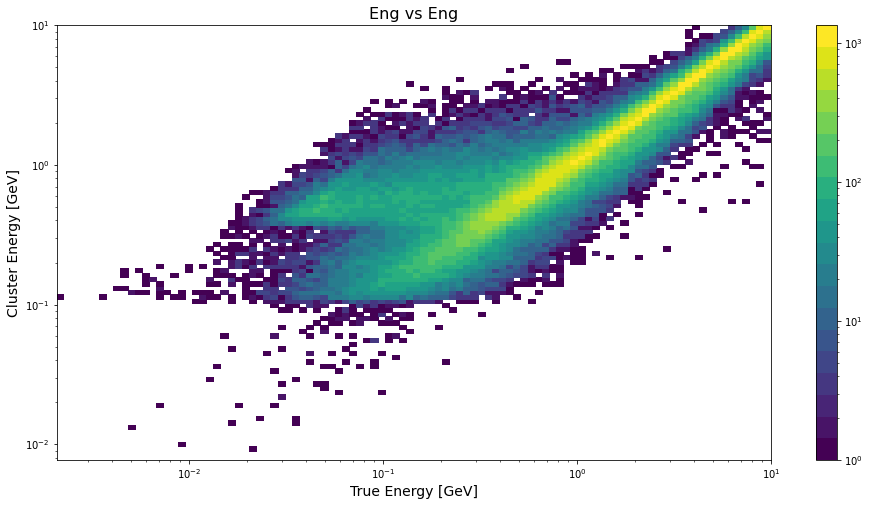

In [35]:
Plot_TH2D(og_df, "cluster_ENG_CALIB_TOT", "clusterE", "True Energy [GeV]", "Cluster Energy [GeV]", b1, True, True, n_bins=100, title="Eng vs Eng")

In [36]:
def IQR(hist, n_BinsX, n_BinsY):
    ColumnSum = 0
    ColumnWeightedSum = 0
    
    h = hist.view().T #matrix
    axes = hist.axes.edges.T
    
    xedges = axes[0][0]
    Xaxis = np.array([(xedges[i+1] + xedges[i])/2 for i in range(len(xedges)-1)])
    yedges = axes.T[1].flatten()
    Yaxis = np.array([(yedges[i+1] + yedges[i])/2 for i in range(len(yedges)-1)])
    
    # size nBinX and nBinY
    ArrX, ArrY = [], []
    x = []
    y = []
    
    xq = [.25, .5, .75]
    yq = [] #size 3
    
    cnt_t = 0
    
    n_NAN = 1
    for i in range(n_BinsX-1): 
        cnt_t = 0
        cnt_c = 0
        for j in range(1, n_BinsY):
            x.append(Yaxis[j])
            y.append(h[i][j])
            cnt_t += h[i][j]
        
        q1 = 0
        q3 = 0
        Median = -1
        
        for j in range(n_BinsY-1):
            cnt_c += y[j]
            if (cnt_c >= cnt_t/4 and not q1):
                q1 = x[j]
            if (cnt_c >= cnt_t/2 and Median == -1): 
             #   Median = TMath::Median(n_BinsY, &x[0], &y[0]);
                Median = np.median(np.linspace(x[0],y[0],n_BinsY))
            
            if (cnt_c >= 3*cnt_t/4 and not q3):
                q3 = x[j]

        ArrX.append( Xaxis[i] )
        ArrY.append( (q3 - q1) / np.median(np.linspace(x[0],y[0],n_BinsY)) )
        if (Median == 0 or Xaxis[i] < .1):
            n_NAN+=1
    
    plt.plot(ArrX[n_NAN:], ArrY[n_NAN:],'--.')
   # plt.plot(ArrX, ArrY)


    plt.xscale("log")
    plt.xlabel("Energy [GeV]",fontsize=14)
    plt.ylabel(r"$\frac{IQR}{mean}$",fontsize=14)
    plt.show()


In [37]:
def Plot_performance_Old(df,title=""):
    l_true = df["cluster_ENG_CALIB_TOT"].values
    l_calib = df["clusterECalib"].values
    Ratio = l_calib/l_true
    
    n1 = len(l_true)
    n2 = len(l_calib)
    n_entries = n1

    MinX = .05
    MaxX = max(l_true)

    MaxY = 2
    MinY = 0

    n_bins = 100
    
    LogWidth  = []
    yWidth = []

    for i in range(n_bins+1):
        exponent = np.log10(MinX) + (np.log10(MaxX) - np.log10(MinX))/float(n_bins)*i
        LogWidth.append(pow(10, exponent))
        yWidth.append(MinY + i*(MaxY - MinY)/n_bins)
        
    #defines how axes are spaced
    xaxes = bh.axis.Variable(LogWidth, underflow=True, overflow=True) 
    yaxes = bh.axis.Variable(yWidth, underflow=True, overflow=True)
    
    hist = bh.Histogram(xaxes,yaxes)
    
    values = np.array([l_true,Ratio])
    
    hist.reset()
    hist.fill(*values)
    
    h = hist.view().T 
    
    return hist
   # MRatio = GraphMean(len(xedges),len(yedges),h,xedges,yedges)
   # plothist2d(hist,MRatio,xedges,title)
   # return hist

In [38]:
hist =  Plot_performance_Old(og_df,title="")

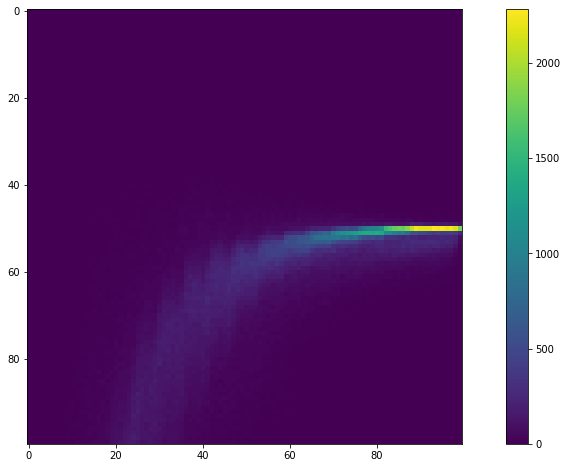

In [46]:
plt.figure(figsize=(16,8))
plt.imshow(hist.view().T)
plt.colorbar()
plt.show()

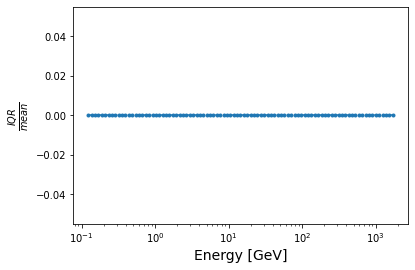

In [39]:
IQR(hist, 100, 100)

In [25]:
   ########IQR############
    """
    TCanvas * c_IQR = new TCanvas("c_Ratio", "Means");
    
    IQR->SetLogx();
    auto g_IQR = IQR(h_all);
    TMultiGraph *mg_2 = new TMultiGraph();
    mg_2->Add(g_IQR);
    mg_2->Draw("AC");
    mg_2->GetXaxis()->SetTitle("Energy [GeV]");
    mg_2->GetYaxis()->SetTitle("#frac{IQR}{mean}");
    gPad->Print("IQR.png");
    
    
TGraph * IQR(TH2D * h){

    auto Xaxis = h->GetXaxis();
    auto Yaxis = h->GetYaxis();
    Double_t ArrX[n_BinsX];
    Double_t ArrY[n_BinsX];
    TH2D *subTH2D;
    Double_t x[n_BinsY];
    Double_t y[n_BinsY];
    Double_t xq[3] = {.25, .5, .75}, yq[3];
    Int_t bin;
    Double_t Median, q1, q3;
    Int_t Median_bin;
    Int_t cnt_t = 0, cnt_c;

    Int_t n_NAN = 1;
    for(Int_t i = 1; i <= n_BinsX; i++){
        cnt_t = 0;
        cnt_c = 0;
        for(Int_t j = 1; j <= n_BinsY; j++){
            bin = h->GetBin(i, j);
            x[j] = Yaxis->GetBinCenter(j);
            y[j] = h->GetBinContent(bin);
            cnt_t += h->GetBinContent(bin);
        }
        q1 = 0;
        q3 = 0;
        Median = -1;
        for (Int_t j = 1; j <= n_BinsY; j++){
            cnt_c += y[j];
            if (cnt_c >= cnt_t/4 && !q1) {q1 = x[j];}
            if (cnt_c >= cnt_t/2 && Median == -1) {
                Median = TMath::Median(n_BinsY, &x[0], &y[0]);
                std::cout << "Median: " << Median << "\tQ2: " << x[j] << endl;
            }
            if (cnt_c >= 3*cnt_t/4 && !q3) {q3 = x[j];}

        }
        
        ArrX[i] = Xaxis->GetBinCenter(i);
        ArrY[i] = (q3 - q1) / TMath::Median(n_BinsY, &x[0], &y[0]);
        std::cout << "X Values: " << ArrX[i] << "\tY Values: " << ArrY[i] << "\tQuantile 1: " << q1<<"\tQuantile 3: " << q3<< "\tMedian: " << TMath::Median(n_BinsY, &x[0], &y[0]) << endl;
        if (Median == 0 || Xaxis->GetBinCenter(i) < .1) n_NAN++;
    }

    TGraph * g = new TGraph(n_BinsX-n_NAN, &ArrX[n_NAN], &ArrY[n_NAN]);

    g->SetLineColor(2);

    return g;

    }
    """

def Plot_IQR(df):
   # iqr = iqr(og_df)
    mean = 
    Ratio = iqr/mean
    
    n1 = len(l)
    n2 = len(l_calib)
    n_entries = n1

    MinX = .05
    MaxX = max(l_true)

    MaxY = 2
    MinY = 0

    n_bins = 100
    
    LogWidth  = []
    yWidth = []

    for i in range(n_bins+1):
        exponent = np.log10(MinX) + (np.log10(MaxX) - np.log10(MinX))/float(n_bins)*i
        LogWidth.append(pow(10, exponent))
        yWidth.append(MinY + i*(MaxY - MinY)/n_bins)
        
    #defines how axes are spaced
    xaxes = bh.axis.Variable(LogWidth, underflow=True, overflow=True) 
    yaxes = bh.axis.Variable(yWidth, underflow=True, overflow=True)
    
    hist = bh.Histogram(xaxes,yaxes)
    
    values = np.array([l_true,Ratio])
    
    hist.reset()
    hist.fill(*values)
    
    h = hist.view().T 
    axes = hist.axes.edges.T
    xedges = axes[0][0]
    xedges = np.array([(xedges[i+1] + xedges[i])/2 for i in range(len(xedges)-1)])
    yedges = axes.T[1].flatten()
    yedges = np.array([(yedges[i+1] + yedges[i])/2 for i in range(len(yedges)-1)])
    
    plothist2d(hist,MRatio,xedges,title)
    
    
    plt.plot(Ratio,color="red",lw=0.75)
    plt.title("IQR",fontsize=16)
    plt.xlabel("Energy [GeV]",fontsize=14)
    plt.ylabel("Ratio = $\frac{IQR}{mean}$",fontsize=14)
    
print(iqr)

IndentationError: unexpected indent (1254092998.py, line 2)

In [48]:
mat = np.array([[1,2,3],[4,5,6],[7,8,9]])
mat

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [58]:
mat.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [60]:
for rows in mat:
    for ele in rows:
        print(ele)

1
2
3
4
5
6
7
8
9


In [63]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [82]:
for i in range(mat.shape[0]): 
  #  print(mat[i])
    for j in range(mat.shape[1]):
       # print(mat[j])
        print(mat[i][j])
       # pass
#print(mat.shape[1])

1
2
3
4
5
6
7
8
9


In [61]:
mat.shape[0]

3

In [49]:
mat.shape

(3, 3)

In [54]:
mat.reshape(9,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [55]:
mat.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [88]:
q1 = 0

In [87]:
if not q1:
    print("Hi")

## IGNORE (TROUBLESHOOTING)

In [109]:
xedges = axes[0][0]
xedges = np.array([(xedges[i+1] + xedges[i])/2 for i in range(len(xedges)-1)])
yedges = axes.T[1].flatten()
yedges = np.array([(yedges[i+1] + yedges[i])/2 for i in range(len(yedges)-1)])

xedges.shape

(100,)

In [129]:
yedges = axes.T[1].flatten()
yedges = np.array([(yedges[i+1] + yedges[i])/2 for i in range(len(yedges)-1)])
yedges.shape

(100,)

In [130]:
yedges

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99, 1.01, 1.03, 1.05, 1.07, 1.09,
       1.11, 1.13, 1.15, 1.17, 1.19, 1.21, 1.23, 1.25, 1.27, 1.29, 1.31,
       1.33, 1.35, 1.37, 1.39, 1.41, 1.43, 1.45, 1.47, 1.49, 1.51, 1.53,
       1.55, 1.57, 1.59, 1.61, 1.63, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75,
       1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.91, 1.93, 1.95, 1.97,
       1.99])

h shape:  (100, 100)
NAN:  4


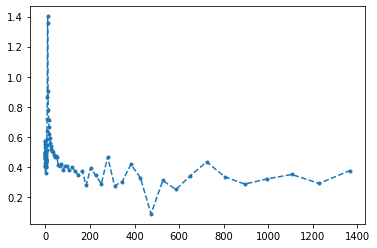

In [155]:
GraphMean(100,100,h,xedges,yedges)

In [156]:
def GraphMean(n_BinsX,n_BinsY,h,Xaxis,Yaxis):
    """
    print("n_BinsX: ", n_BinsX)
    print("n_BinsY: ", n_BinsY)
   # print("Xaxis: ", Xaxis)
   # print("Yaxis: ", Yaxis)
    print("n_BinsX: ", n_BinsX)
    print("n_BinsY: ", n_BinsY)
    print("h shape: ",h.shape)
#    print("h:\n",h) 
    """
    ColumnSum = 0
    print("h shape: ",h.shape)

    ColumnWeightedSum = 0
    ArrX, ArrY = [], []
    n_NAN = 1
    
    for i in range(1,n_BinsX):
        ColumnSum = 0
        ColumnWeightedSum = 0
        for j in range(0,n_BinsY-1):
            ColumnWeightedSum += Yaxis[j] * h[i][j]
            ColumnSum += h[i][j]
        if (ColumnSum != 0):
            ArrY.append(ColumnWeightedSum / ColumnSum)
        else:
            ArrY.append(0)
            n_NAN = i+1
        try:
            if (ArrY[i] > 2):
                n_NAN += 1  
        except:
            pass
        ArrX.append(Xaxis[i])
       # print("ArrY[i]:\t{}\tArrX[i]:\t{}".format(ArrY[i],ArrX[i]))
        
    print("NAN: ", n_NAN)
   # plt.plot(ArrX[n_NAN:n_BinsX-n_NAN],ArrY[n_NAN:n_BinsY-n_NAN],'.--')
   # plt.xscale("log")
   # plt.show()
    return ArrY

In [70]:
h = em_hist.view().T 
axes = em_hist.axes.edges.T

l_true = em_df["cluster_ENG_CALIB_TOT"].values
l_calib = em_df["CalibratedE"].values
Ratio = l_calib/l_true

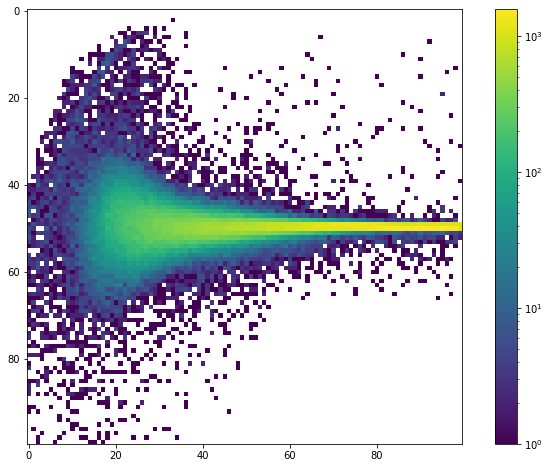

In [75]:
plt.figure(figsize=(12,8))
plt.imshow(h,norm = colors.LogNorm(vmin=1 ,vmax=zs.max()))
zs = h.view().T #color info
plt.colorbar()
plt.show()

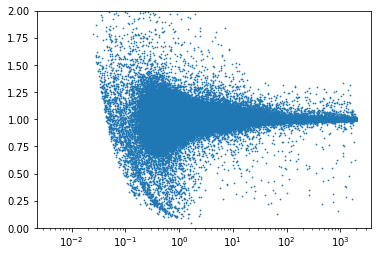

In [88]:
plt.scatter(l_true,Ratio,s=0.5)
plt.xscale("log")
plt.ylim(0,2)
plt.show()

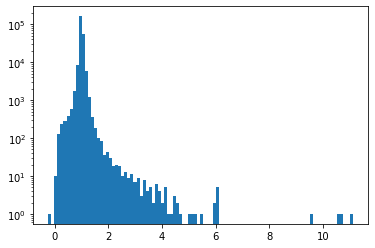

In [82]:
plt.hist(Ratio,bins=100)
plt.yscale("log")
plt.show()